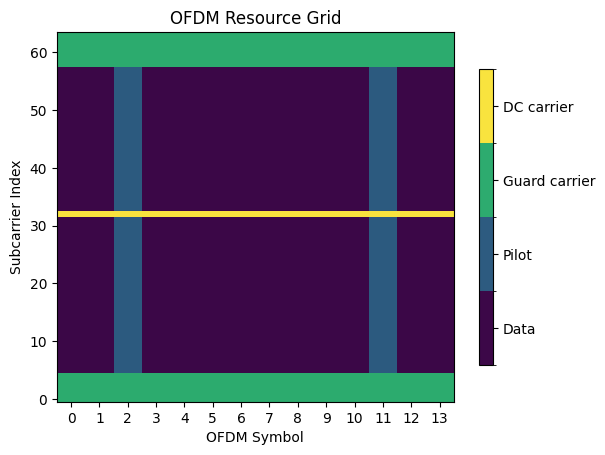

In [12]:
import numpy as np
import tensorflow as tf
from sionna.ofdm import ResourceGrid

rg = ResourceGrid(num_ofdm_symbols = 14,
                  fft_size = 64,
                  subcarrier_spacing = 30e3,
                  num_tx = 1,
                  num_streams_per_tx = 1,
                  num_guard_carriers = [5, 6],
                  dc_null = True,
                  pilot_pattern = "kronecker",
                  pilot_ofdm_symbol_indices = [2, 11])
rg.show();


In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sionna.ofdm import ResourceGrid

# Define LTE FDD slot parameters
rg_lte = ResourceGrid(
    num_ofdm_symbols=7,  # One LTE slot with normal cyclic prefix
    fft_size=72,  # Scaled-down FFT size for visualization (2048 in LTE)
    subcarrier_spacing=15e3,  # LTE standard subcarrier spacing
    num_tx=1,  # Single antenna transmission
    num_streams_per_tx=1,  # Single stream
    num_guard_carriers=[6, 5],  # Guard bands (typically around DC)
    dc_null=True,  # LTE nulls DC carrier
    pilot_pattern="kronecker",  # Pilot pattern
    pilot_ofdm_symbol_indices=[2, 5]  # Example LTE pilot locations
)

# Generate and save the resource grid visualization
fig = rg_lte.show()  # This returns a Matplotlib figure
fig.savefig("lte_resource_grid.png", dpi=300, bbox_inches='tight')  # Save as PNG
plt.close(fig)  # Close the figure to prevent display issues


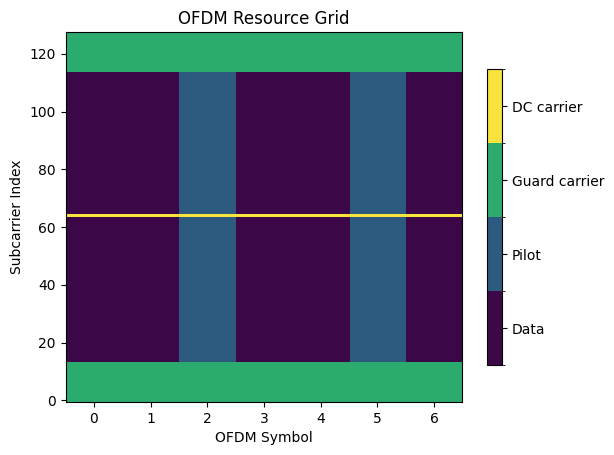

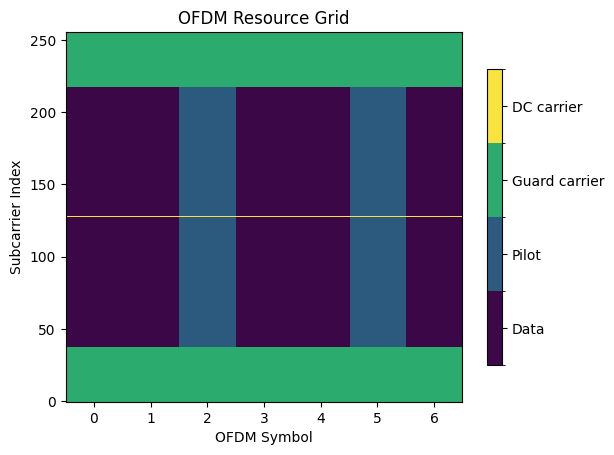

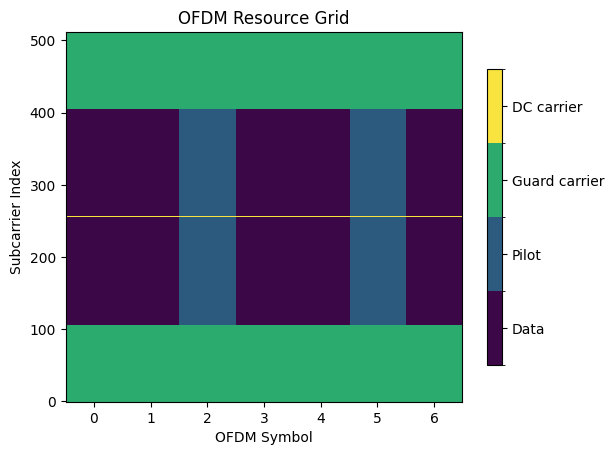

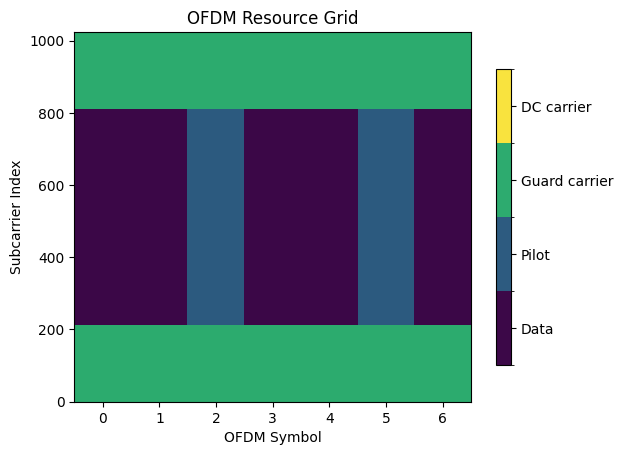

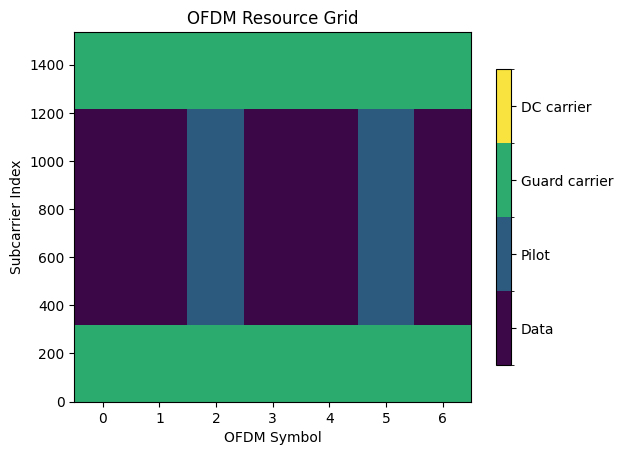

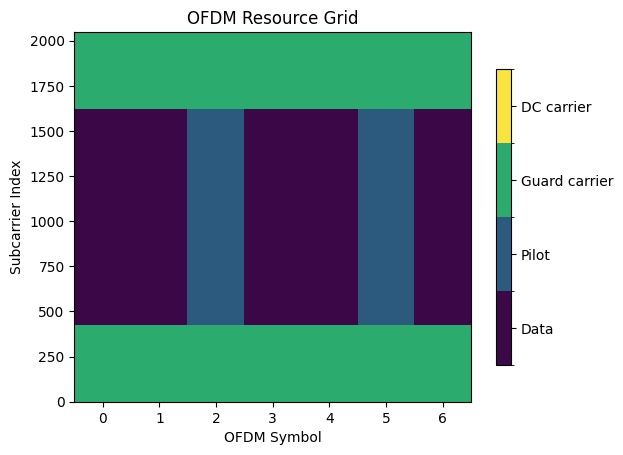

In [20]:
import numpy as np
import tensorflow as tf
from sionna.ofdm import ResourceGrid

def create_lte_resource_grid(bandwidth_mhz):
    # Define LTE-specific parameters based on bandwidth
    lte_params = {
        1.4: {"fft_size": 128, "num_rbs": 6, "num_guard_carriers": [14, 14]},
        3:   {"fft_size": 256, "num_rbs": 15, "num_guard_carriers": [38, 38]},
        5:   {"fft_size": 512, "num_rbs": 25, "num_guard_carriers": [106, 106]},
        10:  {"fft_size": 1024, "num_rbs": 50, "num_guard_carriers": [212, 212]},
        15:  {"fft_size": 1536, "num_rbs": 75, "num_guard_carriers": [318, 318]},
        20:  {"fft_size": 2048, "num_rbs": 100, "num_guard_carriers": [424, 424]},
    }

    # Get the parameters for the chosen bandwidth
    if bandwidth_mhz not in lte_params:
        raise ValueError("Invalid LTE bandwidth. Choose from 1.4, 3, 5, 10, 15, 20 MHz.")

    params = lte_params[bandwidth_mhz]

    # Create the ResourceGrid for LTE slot
    rg_lte = ResourceGrid(
        num_ofdm_symbols=7,  # LTE slot (normal CP)
        fft_size=params["fft_size"],  
        subcarrier_spacing=15e3,  # LTE standard
        num_tx=1,  
        num_streams_per_tx=1,  
        num_guard_carriers=params["num_guard_carriers"],  
        dc_null=True,  
        pilot_pattern="kronecker",  
        pilot_ofdm_symbol_indices=[2, 5]  # LTE-like pilot positions
    )
    
    return rg_lte

# Example: Show LTE resource grid for 10 MHz bandwidth
create_lte_resource_grid(1.4).show();
create_lte_resource_grid(3).show();
create_lte_resource_grid(5).show();
create_lte_resource_grid(10).show();
create_lte_resource_grid(15).show();
create_lte_resource_grid(20).show();
